### Merged df that contains annotations and predictions obtained from pretrained Yolov5

In [1]:
import pandas as pd
import os
import cv2 as cv
import matplotlib.pyplot as plt
import random

In [2]:
merged_df = pd.read_csv("yolov10_merged_preds_annotations.csv")
#merged_df = pd.read_csv("merged_preds_annotations.csv")
merged_df.head()

,x_pred,y_pred,w,h,confidence,class,name,image,base_filename,class_id,x_anno,y_anno,width,height,class_name,filename
0,0.471219,0.519214,0.691867,0.346951,0.873933,46.0,banana,208_5_banana_wob_7.jpg,208_5_banana_wob_7,1,0.463624,0.518105,0.700728,0.343750,banana,208_5_banana_wob_7.txt
1,0.276985,0.525569,0.279096,0.492139,0.449253,46.0,banana,273_3_chilli_wob_46.jpg,273_3_chilli_wob_46,13,0.340030,0.514220,0.383185,0.545966,chilli,273_3_chilli_wob_46.txt
2,0.750785,0.674841,0.498215,0.344104,0.559812,14.0,bird,400_4_tomato_wb_37.jpg,400_4_tomato_wb_37,8,0.751653,0.670883,0.470899,0.336310,tomato,400_4_tomato_wb_37.txt
3,0.505947,0.602331,0.977427,0.790007,0.388267,28.0,suitcase,400_4_tomato_wb_37.jpg,400_4_tomato_wb_37,8,0.751653,0.670883,0.470899,0.336310,tomato,400_4_tomato_wb_37.txt
4,0.348076,0.443880,0.489531,0.546773,0.320207,14.0,bird,413_0_chilli_wb_25.jpg,413_0_chilli_wb_25,12,0.354167,0.396081,0.460648,0.446677,chilli,413_0_chilli_wb_25.txt


In [3]:
merged_df.loc[merged_df['image'] == "208_5_banana_wob_7.jpg"]

,x_pred,y_pred,w,h,confidence,class,name,image,base_filename,class_id,x_anno,y_anno,width,height,class_name,filename
0,0.471219,0.519214,0.691867,0.346951,0.873933,46.0,banana,208_5_banana_wob_7.jpg,208_5_banana_wob_7,1,0.463624,0.518105,0.700728,0.34375,banana,208_5_banana_wob_7.txt


In [4]:
# Todo: revisar por que faltan predicctions, si esta mal hecho el merge o que
merged_df.base_filename.nunique()

385

Falta aprox predecir la mitad del test set.

In [5]:
%matplotlib inline

### Lets visually compare preds vs ground truth

In [6]:
# convert from YOLO format to corner coordinates
def convert_yolo_to_corners(x_center, y_center, width, height, img_width, img_height):
    xmin = int((x_center - width / 2) * img_width)
    ymin = int((y_center - height / 2) * img_height)
    xmax = int((x_center + width / 2) * img_width)
    ymax = int((y_center + height / 2) * img_height)
    return [xmin, ymin, xmax, ymax]

def show_image_with_bbox_from_df(df, test_path):
    while True:
        # as usual, filter out non-image files  and select a random image
        image_files = [f for f in os.listdir(test_path) if f.endswith(".jpg")]
        
        if not image_files:
            print("No images found in the directory.")
            return

        file_name = random.choice(image_files)
        
        img_path = os.path.join(test_path, file_name)
        img = cv.imread(img_path)
        
        if img is None:
            print(f"Failed to load image: {file_name}")
            continue
        
        # Get image dimensions
        img_height, img_width, _ = img.shape
        
        df_image = df[df['image'] == file_name]
           
        if df_image.empty:
            print(f"No annotations found for image: {file_name}")
            continue
        
        print(f"Selected image: {file_name}")

        # loop through each bounding box in the df
        for _, row in df_image.iterrows():
            pred_box = convert_yolo_to_corners(row['x_pred'], row['y_pred'], row['w'], row['h'], img_width, img_height)
            #print(f"Predicted bbox for {file_name}: {pred_box}")
            cv.rectangle(img, (pred_box[0], pred_box[1]), (pred_box[2], pred_box[3]), (255, 0, 0), 7)
            cv.putText(img, f"Pred: {row['name']}", (pred_box[0], pred_box[1] - 10), cv.FONT_HERSHEY_SIMPLEX, 3.5, (255, 0, 0), 2)

            gt_box = convert_yolo_to_corners(row['x_anno'], row['y_anno'], row['width'], row['height'], img_width, img_height)
            #print(f"Ground truth bbox for {file_name}: {gt_box}")
            cv.rectangle(img, (gt_box[0], gt_box[1]), (gt_box[2], gt_box[3]), (0, 255, 0), 10)
            cv.putText(img, f"GT: {row['class_name']}", (gt_box[0], gt_box[1] - 10), cv.FONT_HERSHEY_SIMPLEX, 3.5, (0, 255, 0), 10)

        img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

        plt.figure(figsize=(8, 8))
        plt.imshow(img_rgb)
        plt.axis('off')
        plt.show(block=True)
        plt.close()
        break

In [7]:
test_path = "/Users/marianata/www/vision_fraud_prevention/dataset_fruits_vegs/test/test"

No annotations found for image: 647_0_banana_wb_19.jpg
Selected image: 308_3_apple_wob_3.jpg


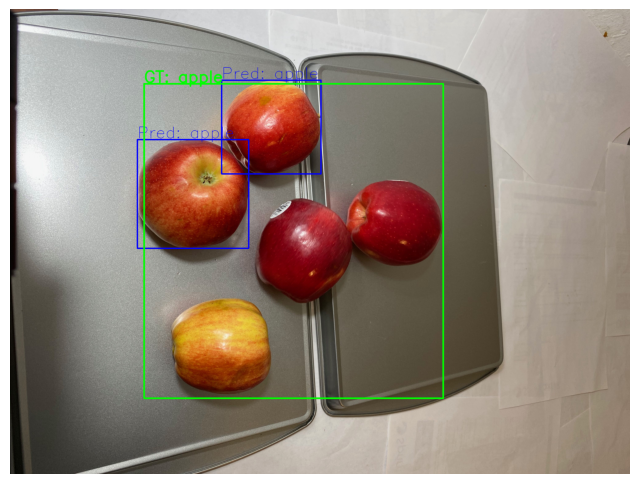

In [11]:
show_image_with_bbox_from_df(merged_df, test_path)

Selected image: 505_1_apple_wb_37.jpg


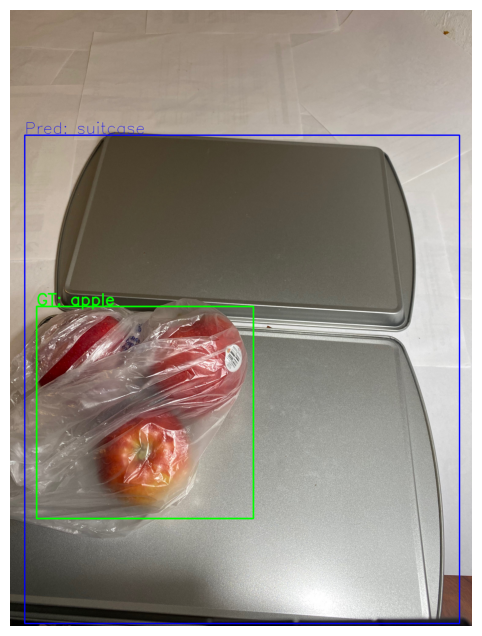

In [12]:
show_image_with_bbox_from_df(merged_df, test_path)

In [13]:
merged_df.columns

Index(['x_pred', 'y_pred', 'w', 'h', 'confidence', 'class', 'name', 'image',
       'base_filename', 'class_id', 'x_anno', 'y_anno', 'width', 'height',
       'class_name', 'filename'],
      dtype='object')

para cada una de las etiquetas de anotacion, ver cuanto esta cubierto de su bounding box por predicciones de la clase corrcta, cuanto esta cubierto por la clase correcta  y cuanto incorrecta?
recall

precision: para cada uno de los cuadrados de prediccion, cual es el overlapping promedio con alguna anotacion de la clase correcta o incorrecta

xs

Selected image: 549_0_lemon_wob_14.jpg

sanity check de que el preprocessing sibre las imagnes es que yolo deberia ver
